In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score

In [2]:
time_slots = ['4h', '6h', '12h', '1d']

# MAE MSE

In [3]:
trues_4h_path = 'Outputs/4h/trues_before_threshold.pkl'
preds_4h_path = 'Outputs/4h/preds_before_threshold.pkl'

trues_4h = pickle.load(open(trues_4h_path, 'rb'))
preds_4h = pickle.load(open(preds_4h_path, 'rb'))

print(trues_4h.shape)
print(preds_4h.shape)

(31570, 4)
(31570, 4)


In [4]:
trues_6h_path = 'Outputs/6h/trues_before_threshold.pkl'
preds_6h_path = 'Outputs/6h/preds_before_threshold.pkl'

trues_6h = pickle.load(open(trues_6h_path, 'rb'))
preds_6h = pickle.load(open(preds_6h_path, 'rb'))

print(trues_6h.shape)
print(preds_6h.shape)

(9240, 4)
(9240, 4)


In [5]:
trues_12h_path = 'Outputs/12h/trues_before_threshold.pkl'
preds_12h_path = 'Outputs/12h/preds_before_threshold.pkl'

trues_12h = pickle.load(open(trues_12h_path, 'rb'))
preds_12h = pickle.load(open(preds_12h_path, 'rb'))

print(trues_12h.shape)
print(preds_12h.shape)

(9240, 4)
(9240, 4)


In [6]:
trues_1d_path = 'Outputs/1d/trues_before_threshold_1d_run3.pkl'
preds_1d_path = 'Outputs/1d/preds_before_threshold_1d_run3.pkl'

trues_1d = pickle.load(open(trues_1d_path, 'rb'))
preds_1d = pickle.load(open(preds_1d_path, 'rb'))

print(trues_1d.shape)
print(preds_1d.shape)

(3850, 4)
(3850, 4)


In [3]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [8]:
print("Trues: ")
print(np.max(trues_4h))
print(np.max(trues_6h))
print(np.max(trues_12h))
print(np.max(trues_1d))
print()
print(np.min(trues_4h))
print(np.min(trues_6h))
print(np.min(trues_12h))
print(np.min(trues_1d))

print("Preds: ")
print(np.max(preds_4h))
print(np.max(preds_6h))
print(np.max(preds_12h))
print(np.max(preds_1d))
print()
print(np.min(preds_4h))
print(np.min(preds_6h))
print(np.min(preds_12h))
print(np.min(preds_1d))

Trues: 
12.0
24.0
24.0
31.0

0.0
0.0
0.0
0.0
Preds: 
1
1
1
1

0
0
0
0


In [9]:
trues_4h = normalize(trues_4h)
trues_6h = normalize(trues_6h)
trues_12h = normalize(trues_12h)
trues_1d = normalize(trues_1d)

preds_4h = normalize(preds_4h)
preds_6h = normalize(preds_6h)
preds_12h = normalize(preds_12h)
preds_1d = normalize(preds_1d)

In [10]:
mae_4h = mae(trues_4h.reshape(-1, 1), preds_4h.reshape(-1, 1))
mae_6h = mae(trues_6h.reshape(-1, 1), preds_6h.reshape(-1, 1))
mae_12h = mae(trues_12h.reshape(-1, 1), preds_12h.reshape(-1, 1))
mae_1d = mae(trues_1d.reshape(-1, 1), preds_1d.reshape(-1, 1))

print("MAE: ")
print(mae_4h)
print(mae_6h)
print(mae_12h)
print(mae_1d)

MAE: 
0.8837193802132824
0.9300933441558441
0.9169552669552671
0.911887306242145


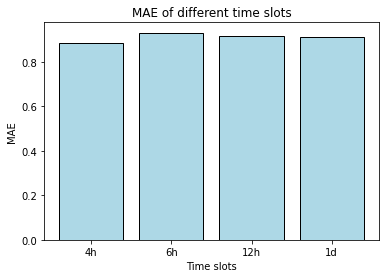

In [11]:
# Plot the mae in bar chart
mae_list = [mae_4h, mae_6h, mae_12h, mae_1d]
plt.bar(time_slots, mae_list, edgecolor='black', color='lightblue')
plt.xlabel('Time slots')
plt.ylabel('MAE')
plt.title('MAE of different time slots')
plt.savefig('Results/mae.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [12]:
mse_4h = mse(trues_4h.reshape(-1, 1), preds_4h.reshape(-1, 1))
mse_6h = mse(trues_6h.reshape(-1, 1), preds_6h.reshape(-1, 1))
mse_12h = mse(trues_12h.reshape(-1, 1), preds_12h.reshape(-1, 1))
mse_1d = mse(trues_1d.reshape(-1, 1), preds_1d.reshape(-1, 1))

print("MSE: ")
print(mse_4h)
print(mse_6h)
print(mse_12h)
print(mse_1d)

MSE: 
0.8687178294266709
0.9071826899951901
0.8940446127946129
0.8771960349743909


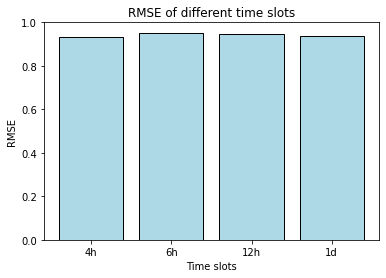

In [13]:
# Plot the mse in bar chart
mse_list = [mse_4h**0.5, mse_6h**0.5, mse_12h**0.5, mse_1d**0.5]
plt.bar(time_slots, mse_list, edgecolor='black', color='lightblue')
plt.xlabel('Time slots')
plt.ylabel('RMSE')
plt.title('RMSE of different time slots')
plt.savefig('Results/rmse.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [14]:
pickle.dump(mae_4h, open("Metrics/mae_4h.pkl", "wb"))
pickle.dump(mae_6h, open("Metrics/mae_6h.pkl", "wb"))
pickle.dump(mae_12h, open("Metrics/mae_12h.pkl", "wb"))
pickle.dump(mae_1d, open("Metrics/mae_1d.pkl", "wb"))

pickle.dump(mse_4h, open("Metrics/mse_4h.pkl", "wb"))
pickle.dump(mse_6h, open("Metrics/mse_6h.pkl", "wb"))
pickle.dump(mse_12h, open("Metrics/mse_12h.pkl", "wb"))
pickle.dump(mse_1d, open("Metrics/mse_1d.pkl", "wb"))

In [15]:
del mae_4h
del mae_6h
del mae_12h
del mae_1d

del mse_4h
del mse_6h
del mse_12h
del mse_1d

# F1 Scores

In [16]:
trues_4h_path = 'Outputs/4h/trues_after_threshold.pkl'
preds_4h_path = 'Outputs/4h/preds_after_threshold.pkl'

trues_4h = pickle.load(open(trues_4h_path, 'rb'))
preds_4h = pickle.load(open(preds_4h_path, 'rb'))

print(trues_4h.shape)
print(preds_4h.shape)

(31570, 4)
(31570, 4)


In [17]:
trues_6h_path = 'Outputs/6h/trues_after_threshold.pkl'
preds_6h_path = 'Outputs/6h/preds_after_threshold.pkl'

trues_6h = pickle.load(open(trues_6h_path, 'rb'))
preds_6h = pickle.load(open(preds_6h_path, 'rb'))

print(trues_6h.shape)
print(preds_6h.shape)

(9240, 4)
(9240, 4)


In [18]:
trues_12h_path = 'Outputs/12h/trues_after_threshold.pkl'
preds_12h_path = 'Outputs/12h/preds_after_threshold.pkl'

trues_12h = pickle.load(open(trues_12h_path, 'rb'))
preds_12h = pickle.load(open(preds_12h_path, 'rb'))

print(trues_12h.shape)
print(preds_12h.shape)

(9240, 4)
(9240, 4)


In [19]:
trues_1d_path = 'Outputs/1d/trues_after_threshold_1d_run3.pkl'
preds_1d_path = 'Outputs/1d/preds_after_threshold_1d_run3.pkl'

trues_1d = pickle.load(open(trues_1d_path, 'rb'))
preds_1d = pickle.load(open(preds_1d_path, 'rb'))

print(trues_1d.shape)
print(preds_1d.shape)

(3850, 4)
(3850, 4)


In [20]:
trues_4h = normalize(trues_4h)
trues_6h = normalize(trues_6h)
trues_12h = normalize(trues_12h)
trues_1d = normalize(trues_1d)

preds_4h = normalize(preds_4h)
preds_6h = normalize(preds_6h)
preds_12h = normalize(preds_12h)
preds_1d = normalize(preds_1d)

In [25]:
# print(trues_4h.shape)
# print(preds_4h.shape)

trues_1d = trues_1d.reshape(77, -1, 4)
preds_1d = preds_1d.reshape(77, -1, 4)

macro_f1_1d_list = np.full(77, -1.0)
micro_f1_1d_list = np.full(77, -1.0)

for i in range(77):
    macro_f1_1d_list[i] = f1_score(trues_1d[i, :, :].reshape(-1, 1), preds_1d[i, :, :].reshape(-1, 1), average='macro')
    micro_f1_1d_list[i] = f1_score(trues_1d[i, :, :].reshape(-1, 1), preds_1d[i, :, :].reshape(-1, 1), average='micro')

print("Macro F1: ")
print(macro_f1_1d_list)
print("Micro F1: ")
print(micro_f1_1d_list)

pickle.dump(macro_f1_1d_list, open("Metrics/macro_f1_1d.pkl", "wb"))
pickle.dump(micro_f1_1d_list, open("Metrics/micro_f1_1d.pkl", "wb"))

trues_1d = trues_1d.reshape(-1, 4)
preds_1d = preds_1d.reshape(-1, 4)

Macro F1: 
[0.4563576  0.4171627  0.44374913 0.44511986 0.35499876 0.39290918
 0.36755952 0.36609497 0.34796238 0.44660432 0.37785026 0.4472957
 0.42922374 0.43706745 0.4352458  0.46666667 0.4171627  0.42827443
 0.44511986 0.47361495 0.40266452 0.4352458  0.45470233 0.40798204
 0.37123244 0.43534726 0.40266452 0.40505377 0.48991122 0.42956349
 0.42956349 0.44147644 0.48024948 0.46768743 0.43706745 0.42666667
 0.42241047 0.39117199 0.4352458  0.4511703  0.42984286 0.47578348
 0.49937422 0.45775254 0.45361826 0.39056425 0.47290174 0.40808543
 0.40266452 0.42241047 0.38276946 0.4171627  0.43810235 0.43718712
 0.44293433 0.4        0.40808543 0.39733104 0.45361826 0.42018143
 0.45690313 0.47756156 0.40385591 0.43706745 0.42028986 0.39733104
 0.42984286 0.40808543 0.41360068 0.39542658 0.37147216 0.36276214
 0.45459158 0.3883792  0.4563576  0.40771221 0.41409199]
Micro F1: 
[0.595 0.53  0.6   0.555 0.415 0.5   0.49  0.465 0.48  0.605 0.485 0.58
 0.55  0.575 0.56  0.6   0.53  0.56  0.555 0.6

In [36]:
macro_f1_4h = f1_score(trues_4h.reshape(-1, 1), preds_4h.reshape(-1, 1), average='macro')
macro_f1_6h = f1_score(trues_6h.reshape(-1, 1), preds_6h.reshape(-1, 1), average='macro')
macro_f1_12h = f1_score(trues_12h.reshape(-1, 1), preds_12h.reshape(-1, 1), average='macro')
macro_f1_1d = f1_score(trues_1d.reshape(-1, 1), preds_1d.reshape(-1, 1), average='macro')

print("Macro F1: ")
print(macro_f1_4h)
print(macro_f1_6h)
print(macro_f1_12h)
print(macro_f1_1d)

Macro F1: 
0.24145477350868566
0.3227565812015422
0.34153986400257763
0.4261819632912577


In [37]:
micro_f1_4h = f1_score(trues_4h.reshape(-1, 1), preds_4h.reshape(-1, 1), average='micro')
micro_f1_6h = f1_score(trues_6h.reshape(-1, 1), preds_6h.reshape(-1, 1), average='micro')
micro_f1_12h = f1_score(trues_12h.reshape(-1, 1), preds_12h.reshape(-1, 1), average='micro')
micro_f1_1d = f1_score(trues_1d.reshape(-1, 1), preds_1d.reshape(-1, 1), average='micro')

print("Micro F1: ")
print(micro_f1_4h)
print(micro_f1_6h)
print(micro_f1_12h)
print(micro_f1_1d)

Micro F1: 
0.24397370921761166
0.38392857142857145
0.39591450216450214
0.5487012987012987


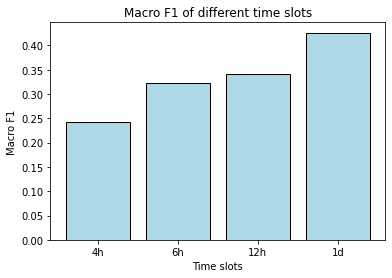

In [38]:
# plot the macro f1 in bar chart
f1_list = [macro_f1_4h, macro_f1_6h, macro_f1_12h, macro_f1_1d]
plt.bar(time_slots, f1_list, edgecolor='black', color='lightblue')
plt.xlabel('Time slots')
plt.ylabel('Macro F1')
plt.title('Macro F1 of different time slots')
plt.savefig('Results/macro_f1.jpg', bbox_inches='tight', dpi=300)
plt.show()

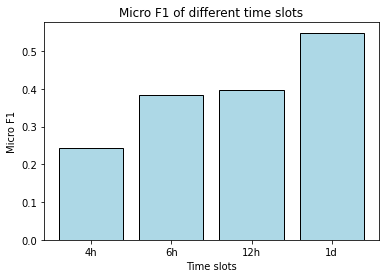

In [39]:
# plot the micro f1 in bar chart
f1_list = [micro_f1_4h, micro_f1_6h, micro_f1_12h, micro_f1_1d]
plt.bar(time_slots, f1_list, edgecolor='black', color='lightblue')
plt.xlabel('Time slots')
plt.ylabel('Micro F1')
plt.title('Micro F1 of different time slots')
plt.savefig('Results/micro_f1.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [40]:
# pickle.dump(macro_f1_4h, open("Metrics/macro_f1_4h.pkl", "wb"))
# pickle.dump(macro_f1_6h, open("Metrics/macro_f1_6h.pkl", "wb"))
# pickle.dump(macro_f1_12h, open("Metrics/macro_f1_12h.pkl", "wb"))
# pickle.dump(macro_f1_1d, open("Metrics/macro_f1_1d.pkl", "wb"))

# pickle.dump(micro_f1_4h, open("Metrics/micro_f1_4h.pkl", "wb"))
# pickle.dump(micro_f1_6h, open("Metrics/micro_f1_6h.pkl", "wb"))
# pickle.dump(micro_f1_12h, open("Metrics/micro_f1_12h.pkl", "wb"))
# pickle.dump(micro_f1_1d, open("Metrics/micro_f1_1d.pkl", "wb"))

# Ablation Study

### MAE RMSE

In [26]:
trues_wo_ext_path = 'Outputs/1d_wo_external/trues_before_threshold.pkl'
preds_wo_ext_path = 'Outputs/1d_wo_external/preds_before_threshold.pkl'

trues_wo_ext = pickle.load(open(trues_wo_ext_path, 'rb'))
preds_wo_ext = pickle.load(open(preds_wo_ext_path, 'rb'))

print(trues_wo_ext.shape)
print(preds_wo_ext.shape)

trues_wo_ext = normalize(trues_wo_ext)
preds_wo_ext = normalize(preds_wo_ext)

(3850, 4)
(3850, 4)


In [27]:
trues_w_ext_path = 'Outputs/1d/trues_before_threshold_1d_run3.pkl'
preds_w_ext_path = 'Outputs/1d/preds_before_threshold_1d_run3.pkl'

trues_w_ext = pickle.load(open(trues_w_ext_path, 'rb'))
preds_w_ext = pickle.load(open(preds_w_ext_path, 'rb'))

print(trues_w_ext.shape)
print(preds_w_ext.shape)

trues_w_ext = normalize(trues_w_ext)
preds_w_ext = normalize(preds_w_ext)

(3850, 4)
(3850, 4)


MAE: 
0.9157980728948472
0.911887306242145


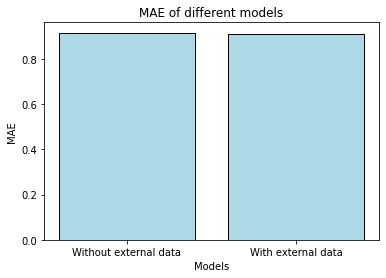

In [28]:
mae_wo = mae(trues_wo_ext.reshape(-1, 1), preds_wo_ext.reshape(-1, 1))
mae_w = mae(trues_w_ext.reshape(-1, 1), preds_w_ext.reshape(-1, 1))

print("MAE: ")
print(mae_wo)
print(mae_w)

# plot the mae in bar chart
mae_list = [mae_wo, mae_w]
plt.bar(['Without external data', 'With external data'], mae_list, edgecolor='black', color='lightblue')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE of different models')
plt.savefig('Results/ablation_mae.jpg', bbox_inches='tight', dpi=300)
plt.show()

RMSE: 
0.9386728938384729
0.9365874411790877


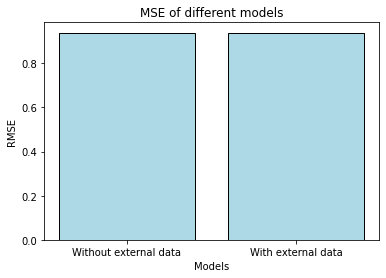

In [29]:
mse_wo = mse(trues_wo_ext.reshape(-1, 1), preds_wo_ext.reshape(-1, 1))
mse_w = mse(trues_w_ext.reshape(-1, 1), preds_w_ext.reshape(-1, 1))

# finding the rmse
mse_wo = mse_wo ** 0.5
mse_w = mse_w ** 0.5

print("RMSE: ")
print(mse_wo)
print(mse_w)

# plot the mse in bar chart
mse_list = [mse_wo, mse_w]
plt.bar(['Without external data', 'With external data'], mse_list, edgecolor='black', color='lightblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('MSE of different models')
plt.savefig('Results/ablation_rmse.jpg', bbox_inches='tight', dpi=300)
plt.show()

### F1 scores

In [38]:
trues_wo_ext_path = 'Outputs/1d_wo_external/trues_after_threshold.pkl'
preds_wo_ext_path = 'Outputs/1d_wo_external/preds_after_threshold.pkl'

trues_wo_ext = pickle.load(open(trues_wo_ext_path, 'rb'))
preds_wo_ext = pickle.load(open(preds_wo_ext_path, 'rb'))

print(trues_wo_ext.shape)
print(preds_wo_ext.shape)

(3850, 4)
(3850, 4)


In [39]:
trues_w_ext_path = 'Outputs/1d/trues_after_threshold_1d_run3.pkl'
preds_w_ext_path = 'Outputs/1d/preds_after_threshold_1d_run3.pkl'

trues_w_ext = pickle.load(open(trues_w_ext_path, 'rb'))
preds_w_ext = pickle.load(open(preds_w_ext_path, 'rb'))

print(trues_w_ext.shape)
print(preds_w_ext.shape)

(3850, 4)
(3850, 4)


Macro-F1: 
0.4204179310507313
0.4261819632912577


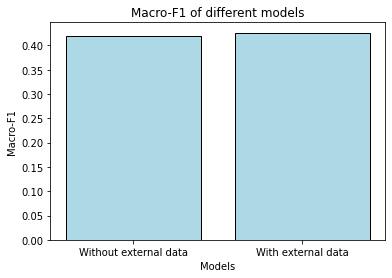

In [40]:
macrof1_wo = f1_score(trues_wo_ext.reshape(-1, 1), preds_wo_ext.reshape(-1, 1), average='macro')
macrof1_w = f1_score(trues_w_ext.reshape(-1, 1), preds_w_ext.reshape(-1, 1), average='macro')

print("Macro-F1: ")
print(macrof1_wo)
print(macrof1_w)

# plot the macrof1 in bar chart
macrof1_list = [macrof1_wo, macrof1_w]
plt.bar(['Without external data', 'With external data'], macrof1_list, edgecolor='black', color='lightblue')
plt.xlabel('Models')
plt.ylabel('Macro-F1')
plt.title('Macro-F1 of different models')
plt.savefig('Results/ablation_macrof1.jpg', bbox_inches='tight', dpi=300)
plt.show()

Micro-F1: 
0.5462987012987013
0.5487012987012987


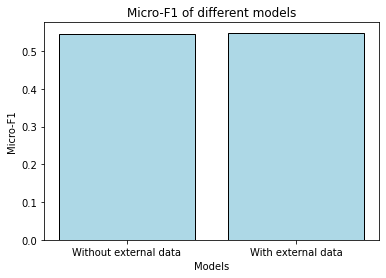

In [41]:
microf1_wo = f1_score(trues_wo_ext.reshape(-1, 1), preds_wo_ext.reshape(-1, 1), average='micro')
microf1_w = f1_score(trues_w_ext.reshape(-1, 1), preds_w_ext.reshape(-1, 1), average='micro')

print("Micro-F1: ")
print(microf1_wo)
print(microf1_w)

# plot the microf1 in bar chart
microf1_list = [microf1_wo, microf1_w]
plt.bar(['Without external data', 'With external data'], microf1_list, edgecolor='black', color='lightblue')
plt.xlabel('Models')
plt.ylabel('Micro-F1')
plt.title('Micro-F1 of different models')
plt.savefig('Results/ablation_microf1.jpg', bbox_inches='tight', dpi=300)
plt.show()